# OPENAI Gym Introduction

In this demo, let us create an environment using OpenAIGym. Let us create a CartPole environment as described here (https://gym.openai.com/envs/CartPole-v0/)and manually play the game. In subsequent modules, we will take a look into algorithms that learns to play by itself.

### CartPole Environment:

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

In [1]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#Build interactive GUIs for our notebook
from ipywidgets import widgets

from IPython.display import display

In [2]:
#Render Outputs in Jupyter notebook
import gym
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

## # Some helper function to let us interact with the environment

In [3]:
# Function that defines what happens when you click one of the buttons
frames = []
def onclick(action):
    global frames
# Takes action at each step and returns four parameters 
    observation, reward, done, info = env.step(action)
# render returns the current state of the environment, sends it in an rgb array and stores it in the frame  
    frame = env.render(mode = 'rgb_array')
    im.set_data(frame)
    frames.append(frame)
    if done:
        env.reset()



def handle_left_click(something):
    
    onclick(0)

def handle_right_click(something):
    """ Apply a force to the right of the cart"""
    onclick(1)
    
def display_buttons():
    """ Display the buttons you can use to apply a force to the cart """
    left = widgets.Button(description="Left")
    right = widgets.Button(description="Right")
    display(left, right)
    
    left.on_click(handle_left_click)
    right.on_click(handle_right_click)

Below we create an  environment and get the first frame from it. We also create couple of buttons for us to control the environment. You can press LEFT and RIGHT and the cartpole moves accordingly. Subsequent frames are stored and displayed below.

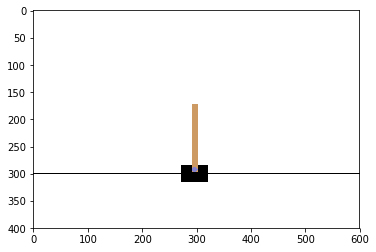

In [4]:
"""Create the environment and display the initial state
   gym.make('CartPole-v0') --> Returns the CartPole Environment that is passed as a parameter
"""
env = gym.make('CartPole-v0')
# Resets the environment and returns the initial observation
observation = env.reset()
# Returns the current state of the environment sent in an rgb array, and stores it in the first frame
firstframe = env.render(mode = 'rgb_array')
fig,ax = plt.subplots()
im = ax.imshow(firstframe) 

In [5]:
# Show the buttons to control the cart
display_buttons()
# Function that defines what happens when you click one of the buttons
frames = []
def onclick(action):
    global frames
    observation, reward, done, info = env.step(action)
    print(observation,reward,done)
    frame = env.render(mode = 'rgb_array')
    im.set_data(frame)
    frames.append(frame)
    if done:
        env.reset()

Button(description='Left', style=ButtonStyle())

Button(description='Right', style=ButtonStyle())

[-0.02649487 -0.19207561  0.00570772  0.2911017 ] 1.0 False
[-0.03033638 -0.38727848  0.01152976  0.58557929] 1.0 False
[-0.03808195 -0.58256001  0.02324134  0.8818718 ] 1.0 False
[-0.04973315 -0.7779898   0.04087878  1.18176966] 1.0 False
[-0.06529295 -0.97361777  0.06451417  1.48698148] 1.0 False
[-0.08476531 -1.16946375  0.0942538   1.79909333] 1.0 False
[-0.10815458 -0.97551406  0.13023567  1.53712969] 1.0 False
[-0.12766486 -0.78217805  0.16097826  1.28776277] 1.0 False
[-0.14330842 -0.5894281   0.18673352  1.04949942] 1.0 False
[-0.15509699 -0.39720763  0.20772351  0.82076223] 1.0 False
[-0.16304114 -0.20544103  0.22413875  0.59992844] 1.0 True
[ 0.03713184  0.19344692 -0.01073869 -0.24877535] 1.0 False
[ 0.04100078  0.38872057 -0.0157142  -0.54482606] 1.0 False


In [6]:
def display_frames_as_gif(frames, filename_gif = None):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    if filename_gif: 
        anim.save(filename_gif, writer = 'imagemagick', fps=20)
    display(display_animation(anim, default_mode='loop'))



MovieWriter imagemagick unavailable. Trying to use pillow instead.



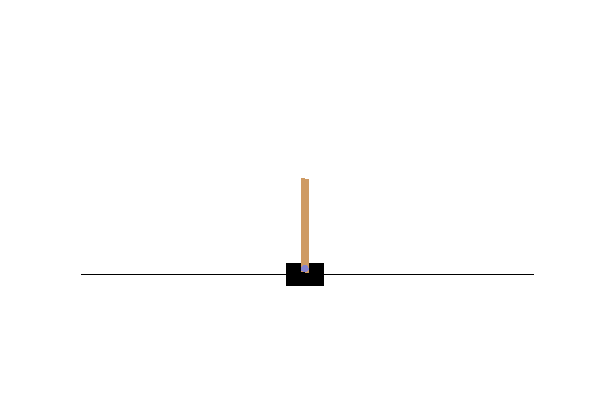
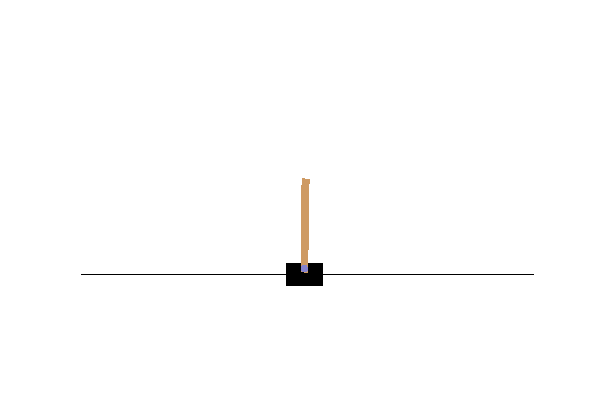
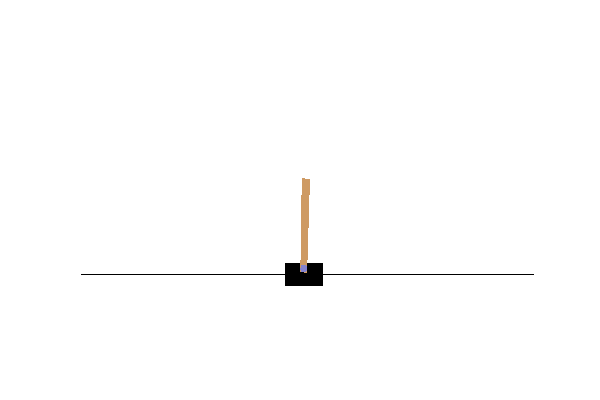
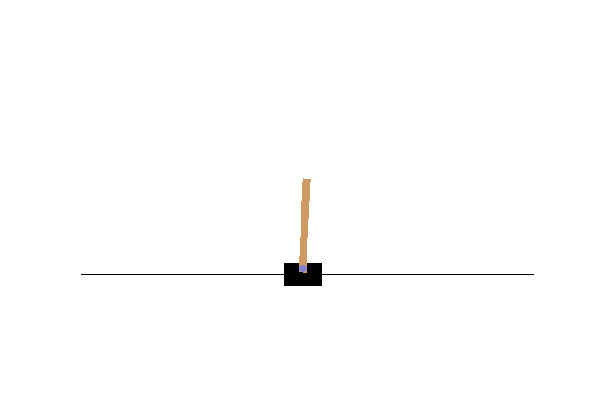
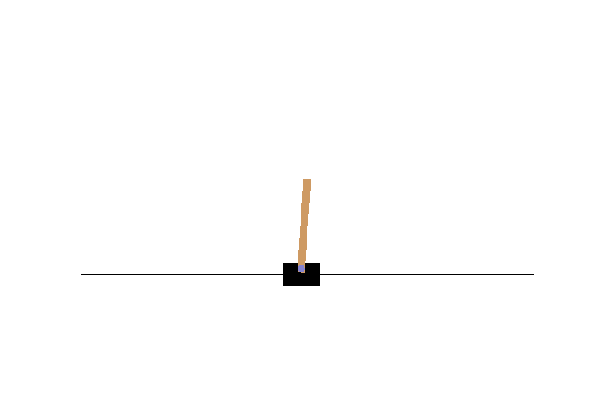
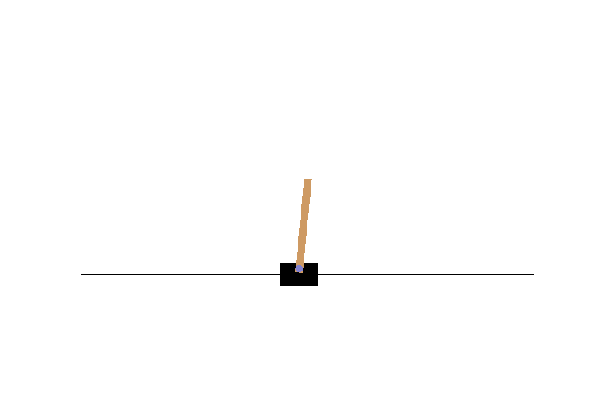
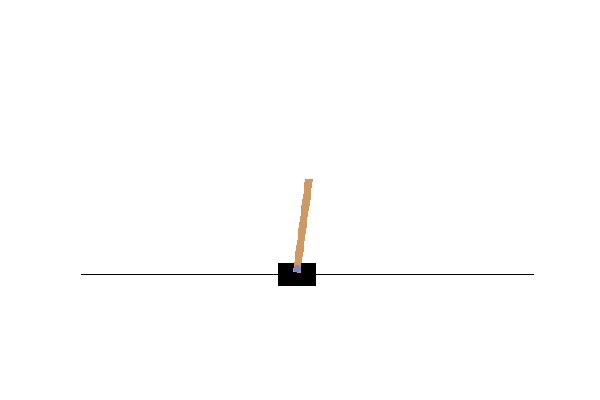
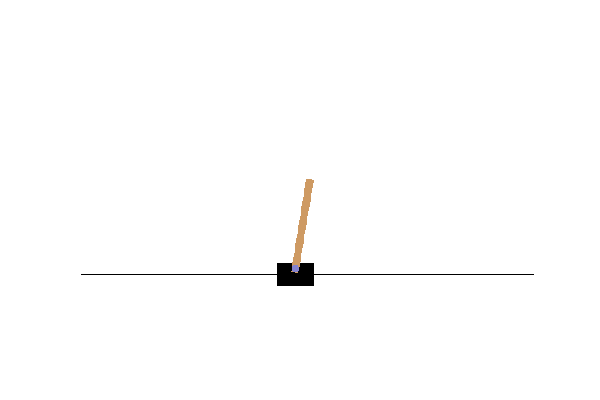
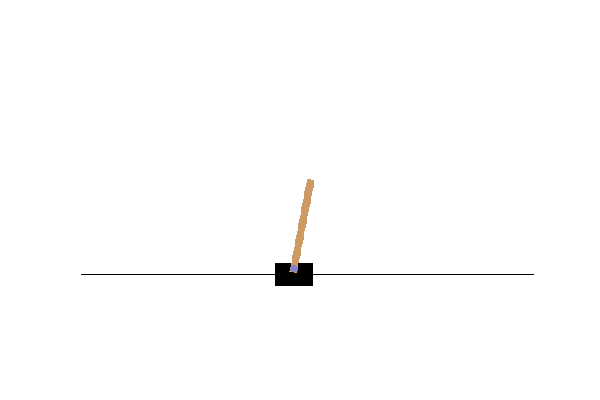
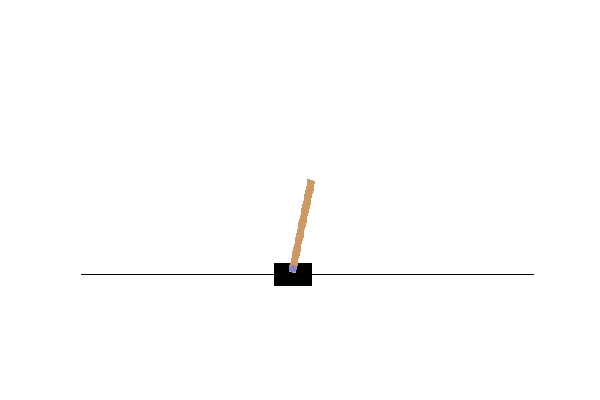
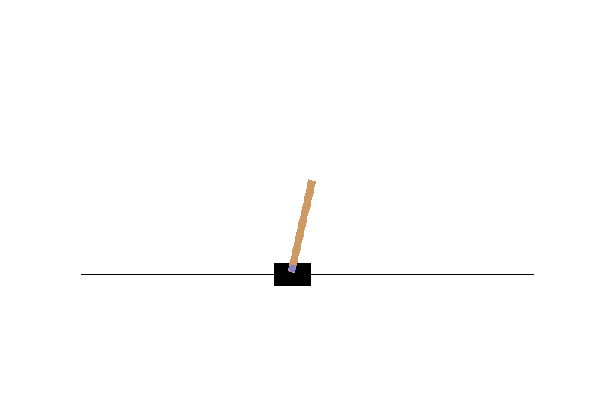
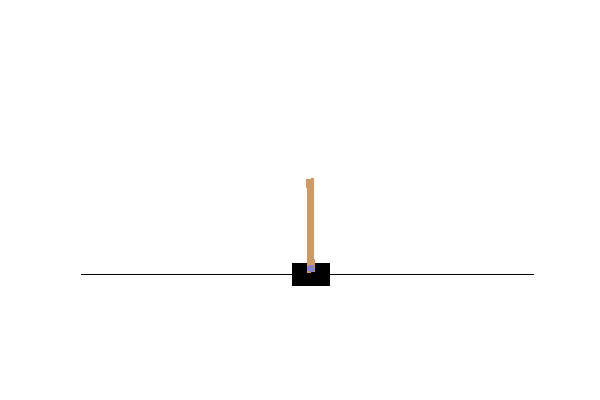
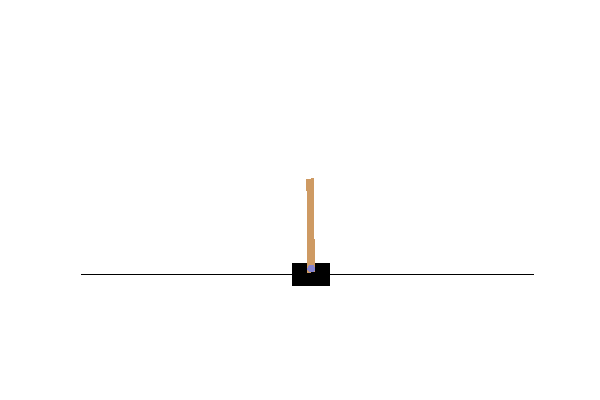

In [7]:
display_frames_as_gif(frames, filename_gif="manualplay.gif")